In [1]:
 from google .colab import files
 uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [2]:
import pandas as pd
data=pd.read_csv("Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.shape

(30, 2)

EDA & transformations

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

correlation

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


PLOTS

<ipython-input-12-b1a08ed53fec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

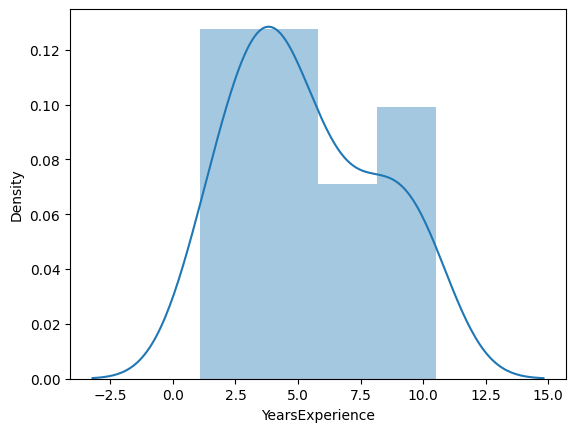

In [12]:
import seaborn as sns
sns.distplot(data['YearsExperience'])


<ipython-input-13-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

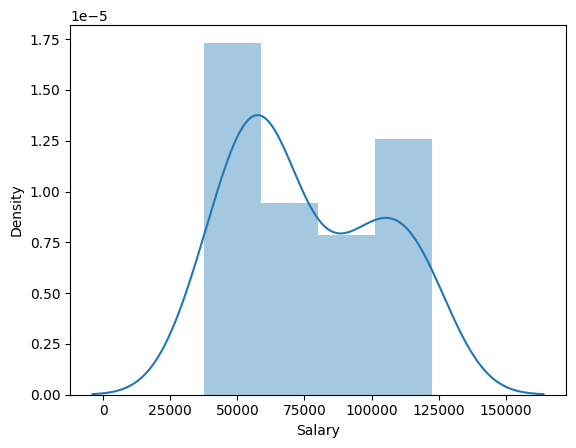

In [13]:
sns.distplot(data['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

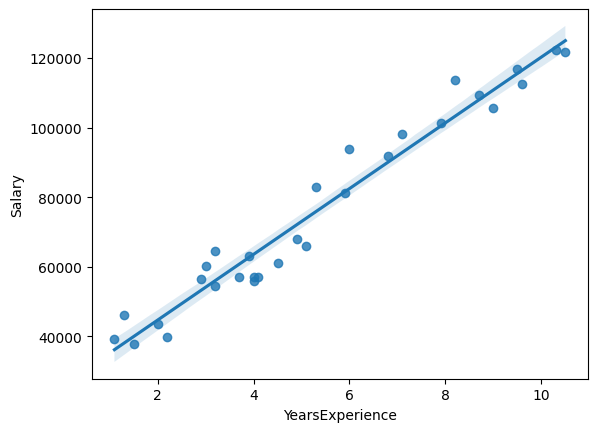

In [14]:
sns.regplot(x="YearsExperience",y='Salary',data=data)

Fitting model

In [16]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()

Testing model

In [18]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
#calculating t and p values
print(model.tvalues,'/n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 /n Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [20]:
#rsquare values
(model.rsquared)

0.9569566641435086

fitting the model again to increase rvalue by transformations

In [22]:
import numpy as np
model1=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [23]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [26]:
print(model1.tvalues,'/n',model1.pvalues)

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 /n Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [28]:
(model1.rsquared,model1.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

Here tne r value got decreased so we conclude that it is not a better model.
hence we proceed for another transformation i.e, sqrt

In [29]:
model2=smf.ols('Salary~np.sqrt(YearsExperience)',data=data).fit()

In [30]:
model2.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [32]:
print(model2.tvalues)

Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64


In [33]:
(model2.rsquared)

0.9310009544993526

on comparing sqrt transformation with normal transformation has better rsquare value. let us check with exp 

In [35]:
model3=smf.ols('Salary~np.exp(YearsExperience)',data=data).fit()

In [36]:

model3.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [38]:
print(model3.tvalues)

Intercept                  16.620427
np.exp(YearsExperience)     5.006889
dtype: float64


In [39]:
(model3.rsquared)

0.47238440560728734

hence after performing some linear transformations like log.sqrt,exp we say among all these higher rsuare value  is having on applying no transformation so we conclude as it is the best model

Predicting data points

In [40]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [42]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64